In [1]:
# Import libraries and magics
%matplotlib inline
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Capstone Project 1: Data Story

In [2]:
# Import dataframe
df = pd.read_csv('loan_clean.csv', header = 0, index_col = 0)

In [3]:
# Examine dataframe
df.head()

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,issue_year,issue_month
0,5000.0,36 months,0.1065,162.87,B,B2,Unknown,10+ years,RENT,24000.0,Verified,2011-12-01,0,credit_card,Other,AZ,27.65,11,Dec
1,2500.0,60 months,0.1527,59.83,C,C4,Other,< 1 year,RENT,30000.0,Source Verified,2011-12-01,1,car,Other,GA,1.00,11,Dec
2,2400.0,36 months,0.1596,84.33,C,C5,Unknown,10+ years,RENT,12252.0,Not Verified,2011-12-01,0,small_business,Other,IL,8.72,11,Dec
3,10000.0,36 months,0.1349,339.31,C,C1,Other,10+ years,RENT,49200.0,Source Verified,2011-12-01,0,other,Other,CA,20.00,11,Dec
4,3000.0,60 months,0.1269,67.79,B,B5,Other,1 year,RENT,80000.0,Source Verified,2011-12-01,0,other,Personal,OR,17.94,11,Dec


## Introduction

Now that the dataset from Lending Club has been cleaned and wrangled, I will be exploring the dataset to better understad how the features relate to loan status.

* Link to dataset: https://resources.lendingclub.com/LoanStats3a.csv.zip
* Link to data wrangling process: https://goo.gl/vSfcwL

## Current Loan Status

Every loan in the Lending Tree dataset has two different categories: 
- Fully Paid: the loan is currently up to date with all payments and is in good standing
- Charged Off: the loan is in default and is not expected to be paid off by the borrower 

For purposes of the data exploration and analysis, I will be assigning the categories as follows: 
- Fully Paid: 0
- Charged Off: 1

In [4]:
print('Number of Loans that are Fully Paid (0) or Charged Off (1):')
df.loan_status.value_counts()

Number of Loans that are Fully Paid (0) or Charged Off (1):


0    36104
1     6431
Name: loan_status, dtype: int64

In [5]:
a = 6431/(36104+6431)*100
print('Percentage of loans that are in default:') 
print(a)

Percentage of loans that are in default:
15.11931350652404


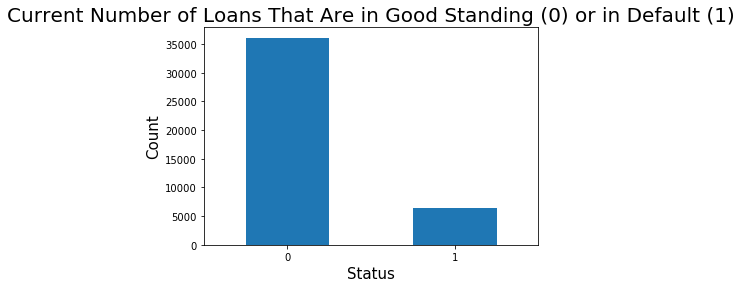

In [6]:
# Create a graph of the number of loans in either good standing or in default
df.loan_status.value_counts().plot(kind = 'bar')
plt.title('Current Number of Loans That Are in Good Standing (0) or in Default (1)', fontsize=20)
plt.xlabel('Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation='horizontal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

### How much money does Lending Club lose to default loans? 

In [7]:
default = df
default = default[default.loan_status == 1]
df.funded_amnt.sum()

460296150.0

Between 2007 and 2011, Lending Club has had over 460 million worth of loans default. This does not take into account the amount of money a borrower paid back on the loan before defaulting or how much Lending Club lost in interest payments on the loan. 

## Defaults over time

Did the number of defaults increase in proportion to the number of loans Lending Club issued each year? Were there periods of time from 2007-2011 that Lending Club had an unusual number of loans default? 

To get a better idea of default trends over time, I took a look at the number of loans Lending Club issued from 2007 and 2011 and compared that to the number of defaults each year. 

In [8]:
# Convert issue_d to datetime
df.issue_d = pd.to_datetime(df.issue_d)

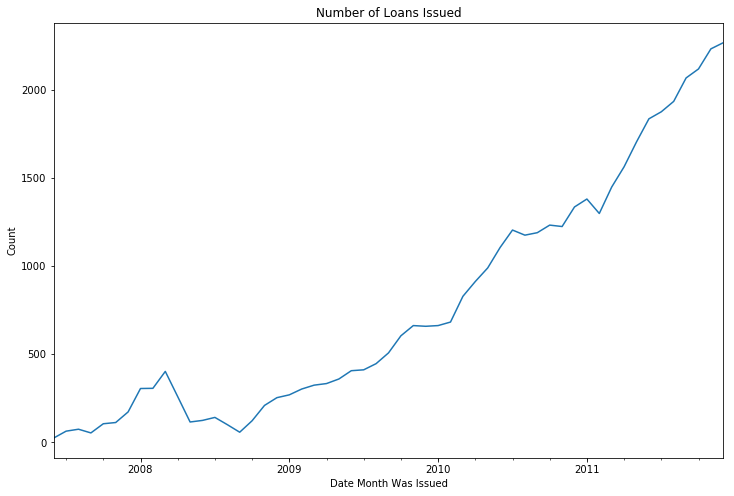

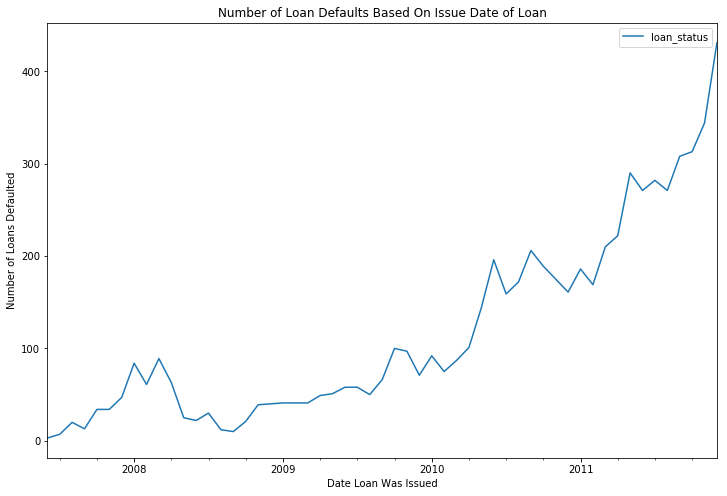

In [9]:
# Plot the number of loans issued over time
df.issue_d.value_counts().sort_index().plot(kind = 'line')
plt.title('Number of Loans Issued')
plt.xlabel('Date Month Was Issued')
plt.ylabel('Count')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Filter for loan_status == 1 and set the index to issue_d (a datetime object)
time = df
time = time.set_index(time.issue_d)
time = time[['loan_status']]
time = time[time.loan_status == 1]

# Plot defaults over time
time.groupby(time.index).count().plot()
plt.title('Number of Loan Defaults Based On Issue Date of Loan')
plt.xlabel('Date Loan Was Issued')
plt.ylabel('Number of Loans Defaulted')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

It appears the number of loans that defaulted has increased in proportion to the number of overall loans issued each month. However, there does appear to be periods of time (especially in late 2010 - early 2011) where the proportion of loans that defaulted compared to the number of loans issued decreased. 

I decided to take a closer look at the information from 2010-2011 to try and identify a more specific window of time for the apparent decrease in defaults per loan: 

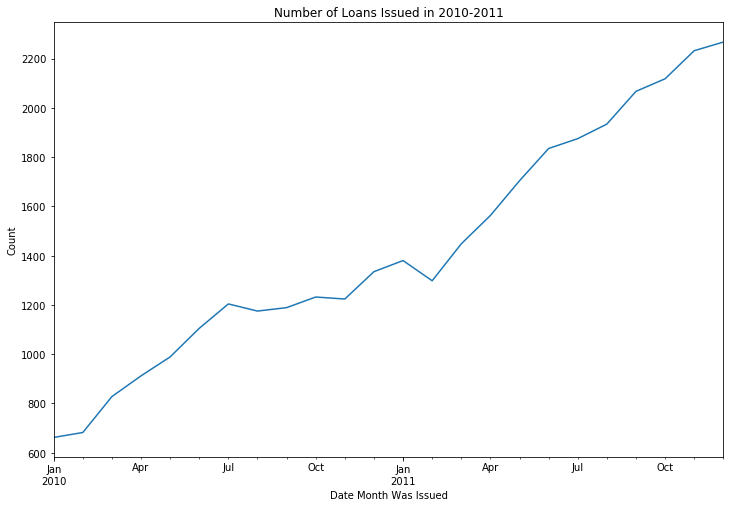

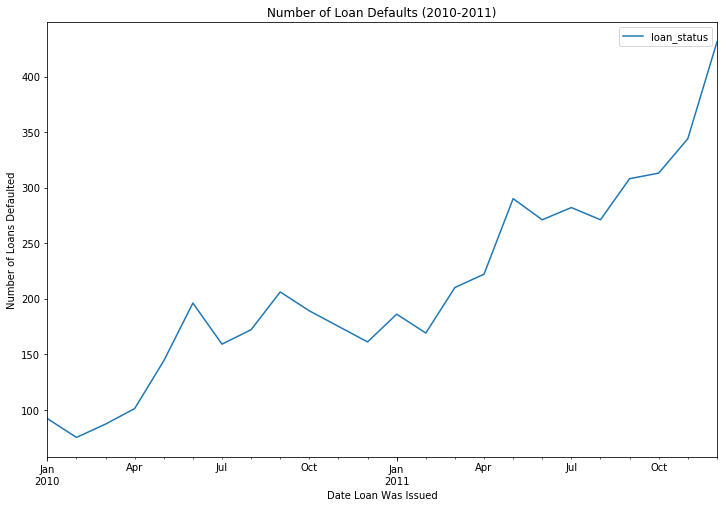

In [10]:
# Plot the number of loans issued over time for 2010-2011
df2 = df
df2 = df2[(df2.issue_year == 10) | (df2.issue_year == 11)]
df2.issue_d.value_counts().sort_index().plot(kind = 'line')
plt.title('Number of Loans Issued in 2010-2011')
plt.xlabel('Date Month Was Issued')
plt.ylabel('Count')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()


time2 = df
time2 = time2[(time2.issue_year == 10) | (time2.issue_year == 11)]
time2 = time2.set_index(time2.issue_d)
time2 = time2[['loan_status']]
time2 = time2[time2.loan_status == 1]

time2.groupby(time2.index).count().plot()
plt.title('Number of Loan Defaults (2010-2011)')
plt.xlabel('Date Loan Was Issued')
plt.ylabel('Number of Loans Defaulted')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()


Upon closer inspection, it appears that the trend lines are still fairly similar. I'll take a closer look at the relationship between the loan issue date and default loans late on in this project. 

## Income distribution of borrowers

Based on conventional wisdome, a borrowers income could indicate the reliability of a borrower to pay back their loan in full with interest. To what degree is this actually the case? 

First, I wanted to get an idea of the income distribution of borrowers using a histogram:

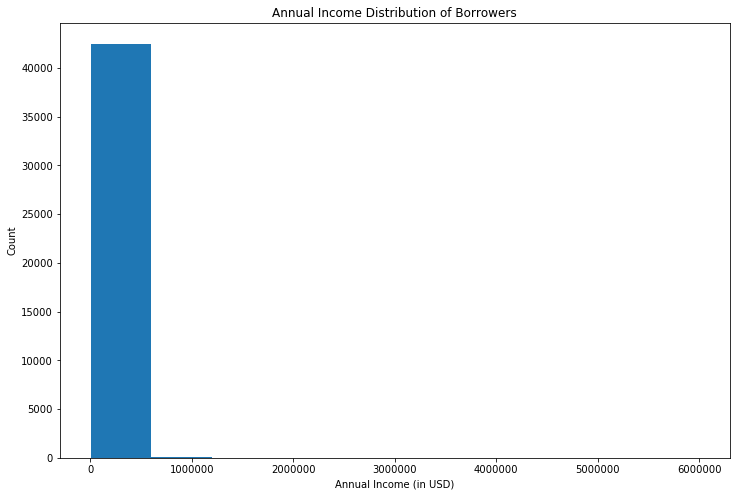

In [11]:
plt.hist(df.annual_inc)
plt.title('Annual Income Distribution of Borrowers')
plt.xlabel('Annual Income (in USD)')
plt.ylabel('Count')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

Due to some outliers in the dataset, I split the graphs into two separate income levels: 

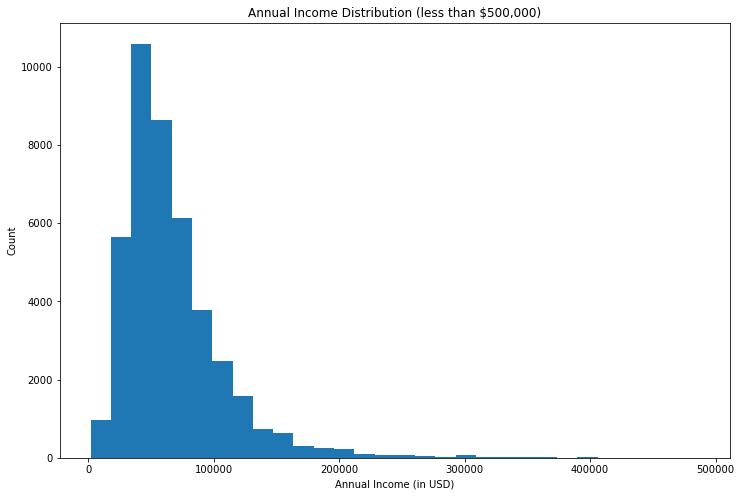

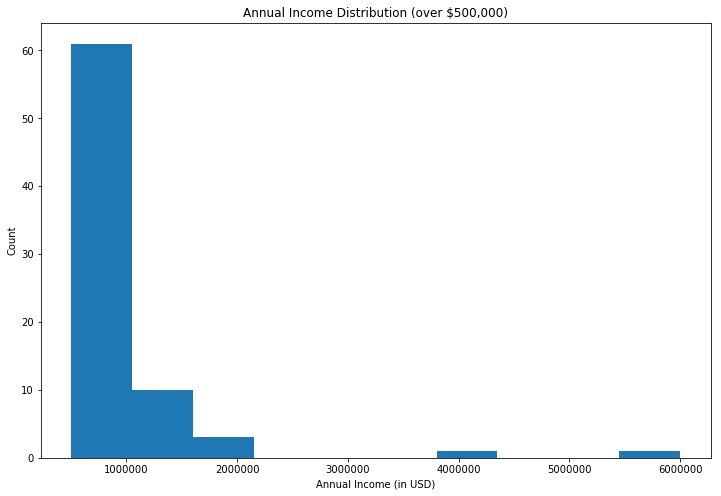

In [12]:
# Create a graph for borrowers who made over $500,000
a = df[df.annual_inc < 500000]
plt.hist(a.annual_inc, 30)
plt.title('Annual Income Distribution (less than $500,000)')
plt.xlabel('Annual Income (in USD)')
plt.ylabel('Count')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Create a graph for borrowers who made over $500,000
b = df[df.annual_inc > 500000]
plt.hist(b.annual_inc)
plt.title('Annual Income Distribution (over $500,000)')
plt.xlabel('Annual Income (in USD)')
plt.ylabel('Count')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

The disbribution of borrowers has a right skewed distribution, with most of the borrowers making less than $100,000 annually. A boxplot helps further illustrate the skew of the distribution:

count    4.253500e+04
mean     6.913656e+04
std      6.409334e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

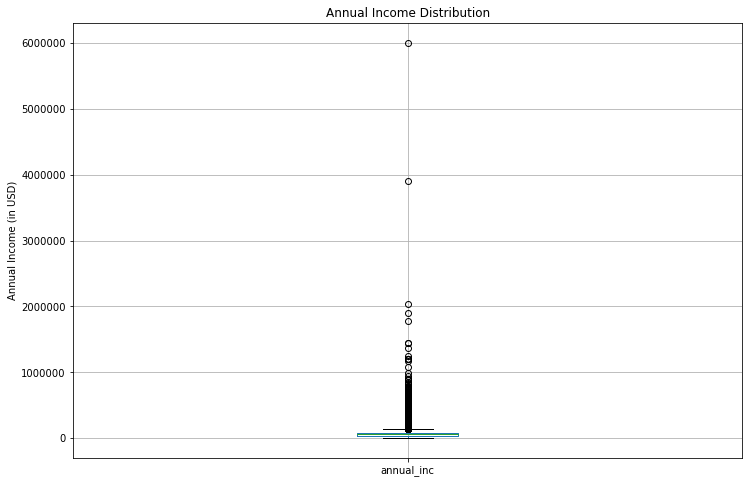

In [13]:
# Create a boxplot of annual_inc
df.boxplot(column=['annual_inc'])
plt.title('Annual Income Distribution')
plt.ylabel('Annual Income (in USD)')

df.annual_inc.describe()

#### So how does income compare to loan status? 

,mean,std
loan_status,,
0,70164.277724,66280.247602
1,63366.870530,49684.103432


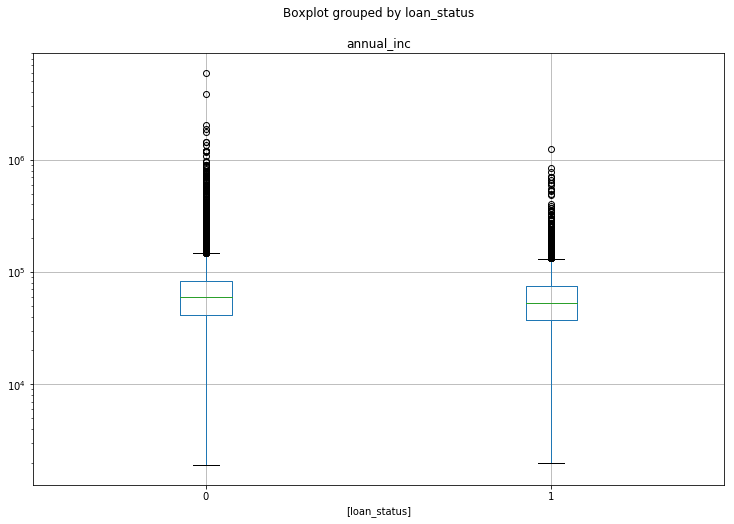

In [14]:
df.boxplot(column=['annual_inc'],by = ['loan_status']).set_yscale('log')
pd.DataFrame(df.groupby( ['loan_status'])['annual_inc'].describe().loc[:,['mean','std']])

It appears that there might not be much of a difference between the income of borrowers who are current on their loans and those who default. I'll wait until I apply inferential statistics in the next unit to draw any definitive conclusions.

## Defaults per Loan Type

One of the most interesting results from my exploratory data anaylsis was the trends in defaults per loan type.

When a loan is issued to a borrower Lending Club gives it a grade rating. The grade is based on an applicants loan application and credit report and is used to determine their interest rate on the loan. Borrowers with the lowest risk (A) have a lower interest rate, while borrowers with the highest risk (G) have the highest interest rates. 


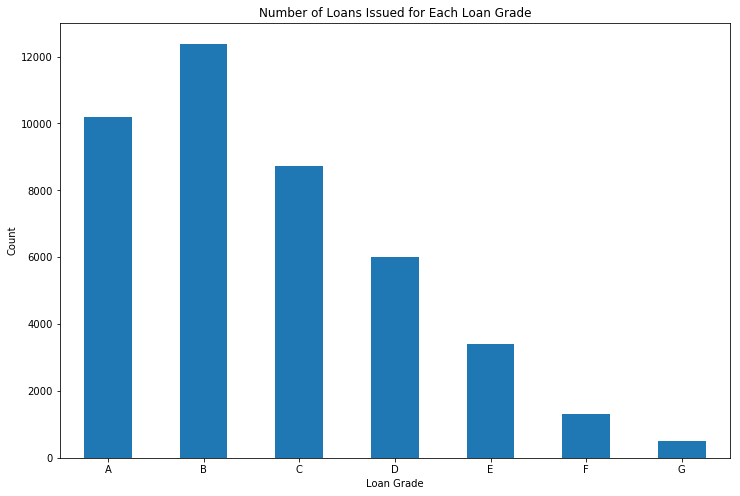

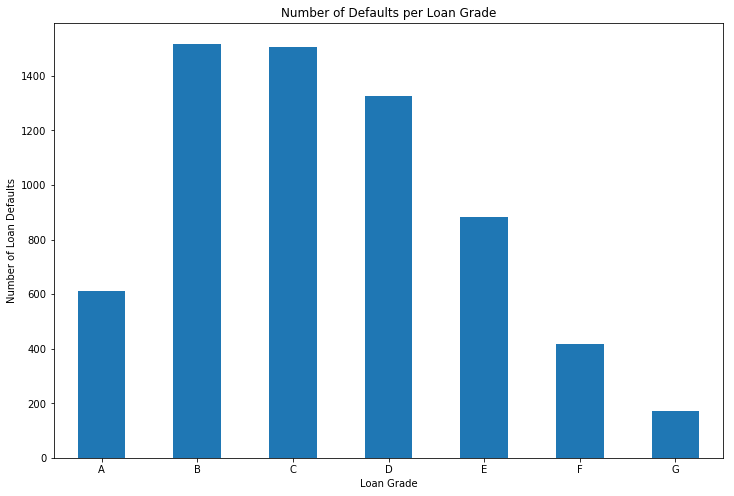

,loan_status
grade,
A,0.059904
B,0.122528
C,0.172082
D,0.220578
E,0.260165
F,0.319754
G,0.337891


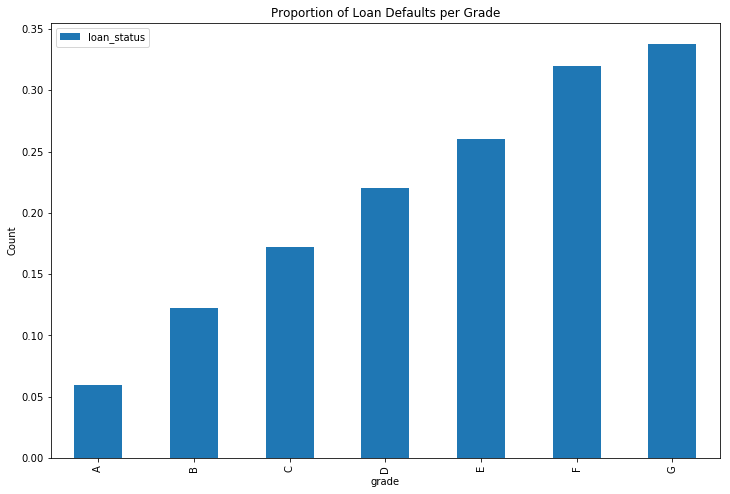

In [15]:
# Create a bar graph that counts the number of loans issued in each grade
df.grade.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Loans Issued for Each Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Create a bar plot that shows how many loans defaulted in each grade
ab = df
ab = df[df.loan_status == 1]
ab.grade.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Defaults per Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loan Defaults')
plt.xticks(rotation='horizontal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

# Create a proportion chart to show the proportion of loans that default in each grade
df.groupby(['grade'])[['loan_status']].mean().plot(kind='bar').set_ylabel('Count')
plt.title('Proportion of Loan Defaults per Grade')
df.groupby(['grade' ])[['loan_status']].mean()

47% of the loans that defaulted were given an B or C grade. However, an individual who receives a G grade loan is 5.6x more likely to default on their loan than an individual who receives an A grade loan and 2.8x more likely to default on their laon than a B grade. 

### Sub Grades

Loans are even given a sub-grade to further distinguish them and determine their exact interest rate. The number of defaults per sub-grade were as follows: 

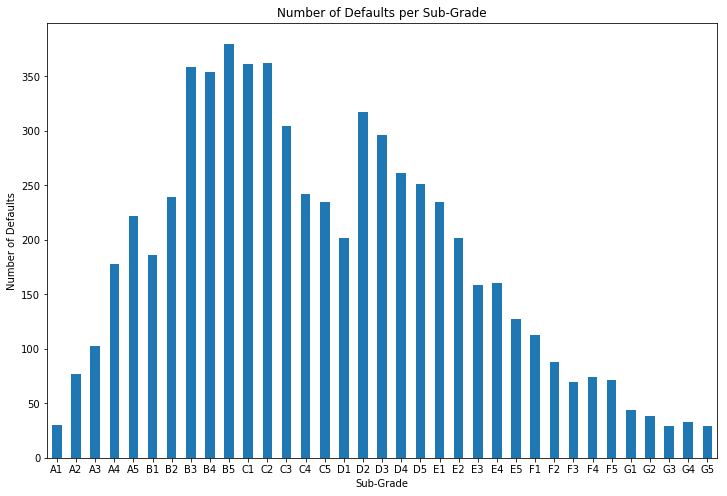

In [16]:
# Create a chart that plots the number of loans issued per Sub-Grade
ab.sub_grade.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of Defaults per Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Number of Defaults')
plt.xticks(rotation='horizontal')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

The proportion of defaults per sub-grade follows a similar pattern as above with a few variances: 

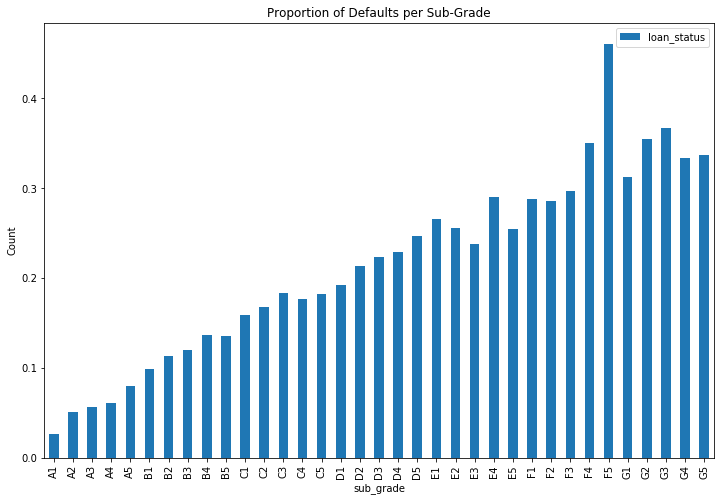

In [17]:
df.groupby(['sub_grade'])[['loan_status']].mean().plot(kind='bar').set_ylabel('Count')
plt.title('Proportion of Defaults per Sub-Grade')

## Conclusions

For this project, I would like to focus on the correlation each feature has to predicting whether or not a borrower is likely to default on their loan.

Based on my initial data wrangling and exploratory data analysis, I predict that the 19 features of this dataset will be able to successfully predict whether an individual will default.